In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import datasets


data = datasets.load_breast_cancer()


In [4]:
df = pd.DataFrame(data["data"], columns = data["feature_names"])

In [5]:
df["target"] = data["target"]

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
y = df["target"]
X = df.drop(columns=["target"])

In [8]:
df.shape

(569, 31)

In [35]:
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='target')
resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
resampled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
resampled_df.shape

(714, 31)

In [25]:
resampled_df["target"].value_counts()

target
0    357
1    357
Name: count, dtype: int64

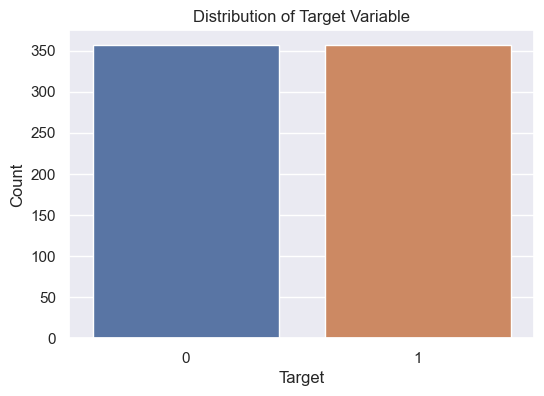

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid") 
plt.figure(figsize=(6, 4))  
sns.countplot(x="target", data=resampled_df)

plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()


In [10]:
resampled_df.to_csv("diabetes_balanced.csv")

In [36]:
X = X_resampled
y = y_resampled

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 33.9755 - accuracy: 0.4553 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 2.7648 - accuracy: 0.6322 - val_loss: 0.1885 - val_accuracy: 0.9231
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5256 - accuracy: 0.8722 - val_loss: 0.2299 - val_accuracy: 0.9091
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3293 - accuracy: 0.9019 - val_loss: 0.1337 - val_accuracy: 0.9301
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2883 - accuracy: 0.9072 - val_loss: 0.3807 - val_accuracy: 0.8601
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2796 - accuracy: 0.9072 - val_loss: 0.4002 - val_accuracy: 0.8531
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2540 - accuracy: 0.9212 - val_loss: 0.2551 - val_accuracy: 0.8951
Epoch 8/100